# Graphillion Intaractive Reference

目標：graphillion.GraPhSetで定義されているメソッドたちを対話的に実行できるリファレンス

Author Mio Kinno

# 前提となる環境

## ユニバース

ユニバースは以下のように定義されているものとし，各メソッドの使用例で定義するグラフセットはユニバースの部分グラフとして与えられる．

```python
universe = [(1, 2), (1, 4), (2, 3), (2, 5), (3, 6), (4, 5), (5, 6)]
GraphSet.set_universe(universe)
```

## 実行環境とライブラリ

* Python3.x


* graphillion 1.0.0
* ipython 5.1.0
* jupyter 1.0.0
* networkx 1.11
* matplotlib 1.5.3
* pandas 0.19.2

matplotlibは最新の2.xにてnetworkxの描画の見た目が変更された．具体的には，ノードを囲む黒線がなくなっている．  
卒業論文や投稿論文に掲載したグラフと統一するため，1つ古いバージョンの1.5.xを使用する．  
また，描画のヘルパー関数として`draw`を定義する．  
matplotlib以外のライブラリは上記のバージョンより新しいものでも動作するはず．

## 便利なツール

jupyter notebookにはnbextensionsという拡張機能がある．これを導入することで，markdownの見出し要素にセクション番号を自動で振ったり，セルのコード片の実行時間を表示できるようになる．導入方法については，以下のGithubリポジトリのREADMEを参照するとよい．

* [ipython-contrib/jupyter_contrib_nbextensions](https://github.com/ipython-contrib/jupyter_contrib_nbextensions)

In [1]:
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import DataFrame

from graphillion import GraphSet

%matplotlib inline

# 日本語フォントに変更
# 実行環境に応じて適宜変更すること
mpl.rcParams['font.family'] = 'Source Han Code JP'

In [31]:
def draw(G, subgraph=None):
    """
    Gを描画する．subgraphを指定すると，その部分が赤く表示される
    """
    nx.draw_networkx_nodes(G, pos, node_color="w")
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos)
    if subgraph is not None:
        subgraph_obj = nx.Graph(data=subgraph)
        nx.draw_networkx_nodes(subgraph_obj, pos, node_color="r")
        nx.draw_networkx_labels(subgraph_obj, pos)
        nx.draw_networkx_edges(subgraph_obj, pos, edgelist=subgraph, edge_color="r", width=3.0)
    plt.xticks([])
    plt.yticks([])

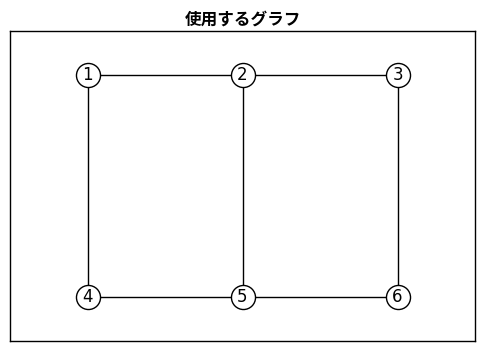

In [3]:
universe = [(1, 2), (1, 4), (2, 3), (2, 5), (3, 6), (4, 5), (5, 6)]
GraphSet.set_universe(universe)
G = nx.Graph(data=universe)
pos = {1:(0,0), 2:(1,0), 3:(2,0), 4:(0,-1), 5:(1, -1), 6:(2, -1)}
plt.title("使用するグラフ")
draw(G)

# 選択メソッド

グラフセットから特定のグラフのみを取り出すメソッドを選択メソッドと分類している．グラフセット同士の集合演算や，極大極小グラフの指定などが含まれる．  
`{メソッド名}_update`というメソッドはselfを変更することを表している．

## union(self, \*others) または gs pipe other  
自身と他のすべてのグラフからなる新しいグラフセットを返す

GraphSet([[], [(1, 2)], [(1, 2), (1, 4)]])


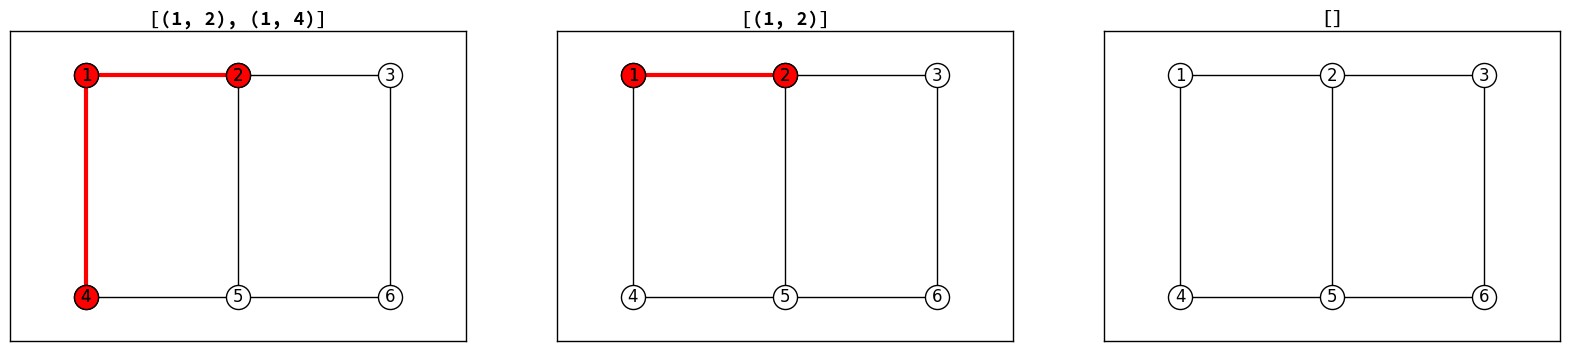

In [38]:
graph1 = []
graph2 = [(1,2)]
graph3 = [(1,2), (1,4)]
gs1 = GraphSet([graph1, graph2])
gs2 = GraphSet([graph2, graph3])
union_gs1_gs2 = gs1.union(gs2)  # gs1 | gs2 でもOK
print(union_gs1_gs2)
plt.figure(figsize=(20, 4))
for i, g in enumerate(union_gs1_gs2):
    plt.subplot(1, 3, i + 1)
    plt.title(g)
    draw(G, g)

## intersection(self, *others) または gs & other  
自身と他のすべてとの共通部分となるグラフからなる新しいグラフセットを返す

GraphSet([[(1, 2)]])


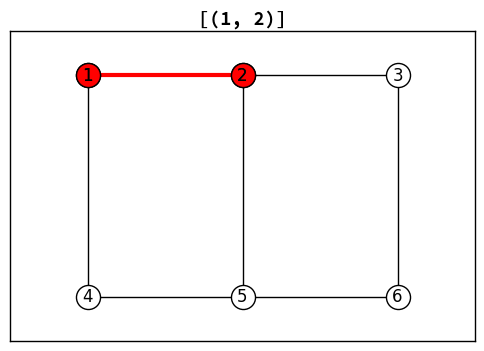

In [5]:
graph1 = []
graph2 = [(1,2)]
graph3 = [(1,2), (1,4)]
gs1 = GraphSet([graph1, graph2])
gs2 = GraphSet([graph2, graph3])
intersection_gs1_gs2 = gs1.intersection(gs2)  # gs1 & gs2 でもOK
print(intersection_gs1_gs2)
for g in intersection_gs1_gs2:
    plt.title(g)
    draw(G, g)

## difference(self, other) または gs - other  
自身に含まれるグラフのうち，他のグラフに含まれないグラフからなる新しいグラフセットを返す

GraphSet([[(1, 2)], [(5, 6)]]) GraphSet([[(1, 2)], [(1, 2), (1, 4)]])
GraphSet([[(5, 6)]])


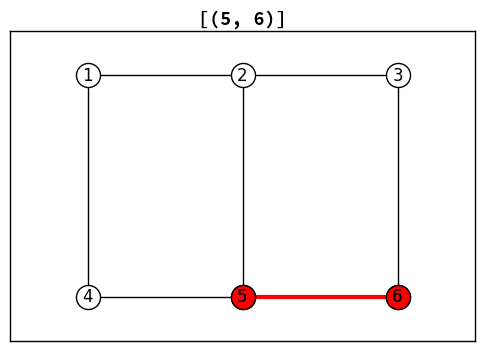

In [6]:
graph1 = [(5,6)]
graph2 = [(1,2)]
graph3 = [(1,2), (1,4)]
gs1 = GraphSet([graph1, graph2])
gs2 = GraphSet([graph2, graph3])
difference_gs1_gs2 = gs1.difference(gs2)  # gs1 - gs2 でもOK
print(gs1, gs2)
print(difference_gs1_gs2)
for g in difference_gs1_gs2:
    plt.title(g)
    draw(G, g)

## symmetric_difference(self, *others) または gs ^ other
自身か他のグラフセットのどちらか一方に含まれるグラフからなる新しいグラフセットを返す

GraphSet([[], [(1, 2)]]) GraphSet([[(1, 2)], [(1, 2), (1, 4)]])
GraphSet([[], [(1, 2), (1, 4)]])


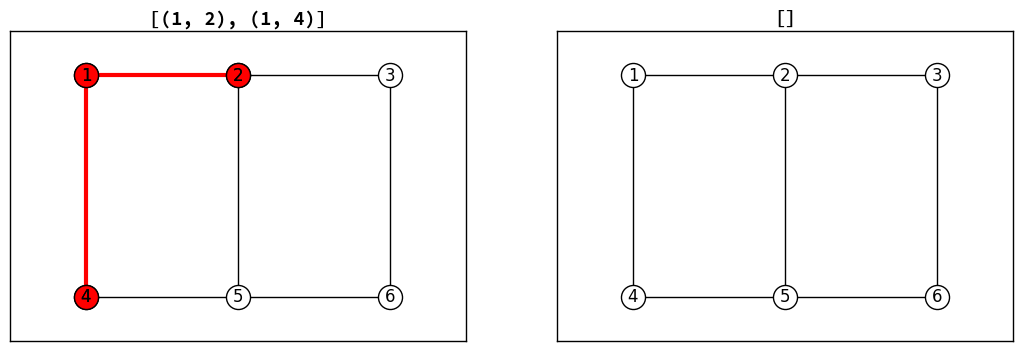

In [40]:
graph1 = []
graph2 = [(1,2)]
graph3 = [(1,2), (1,4)]
gs1 = GraphSet([graph1, graph2])
gs2 = GraphSet([graph2, graph3])
symmetric_difference_gs1_gs2 = gs1.symmetric_difference(gs2)  # gs1 ^ gs2 でもOK
print(gs1, gs2)
print(symmetric_difference_gs1_gs2)
plt.figure(figsize=(20, 4))
for i, g in enumerate(symmetric_difference_gs1_gs2):
    plt.subplot(1, 3, i + 1)
    plt.title(g)
    draw(G, g)

## quotient(self, other) または gs / other
自身と他のグラフセットの商を表す新たなグラフセットを返す  
商の定義を以下に示す  
$gs1 / gs2 = \{a\ |\ a \cup b \in gs1\ and\ a \cap b = \emptyset, \forall b \in gs2\}$

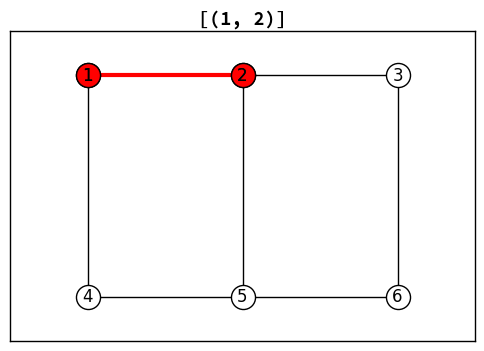

In [8]:
graph1 = [(1,2), (1,4)]
graph2 = [(2,3), (2,5)]
graph3 = [(1,4)]
gs = GraphSet([graph1, graph2])
quotient_gs = gs.quotient(GraphSet([graph3])) # gs / GraphSet([graph3])でもOK
for g in quotient_gs:
    plt.title(g)
    draw(G, g)

## remainder(self, other) またはgs % other
自身と他のグラフセットの余剰を表す新たなグラフセットを返す  
余剰の定義を以下に示す  
$gs1\%gs2=gs1-(gs1 \sqcup (gs1/gs2))$

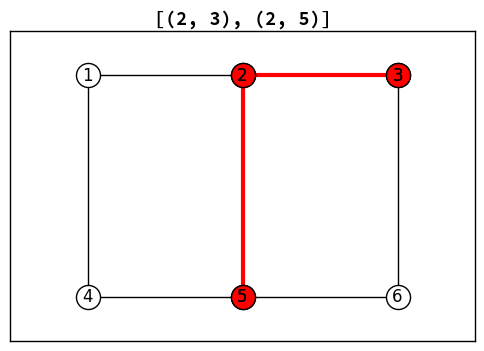

In [9]:
graph1 = [(1,2), (1,4)]
graph2 = [(2,3), (2,5)]
graph3 = [(1,4)]
gs = GraphSet([graph1, graph2])
remainder_gs = gs % GraphSet([graph3])
for g in remainder_gs:
    plt.title(g)
    draw(G, g)

## update(self, other(s))
他のすべてのグラフセットを追加し，自身を更新する

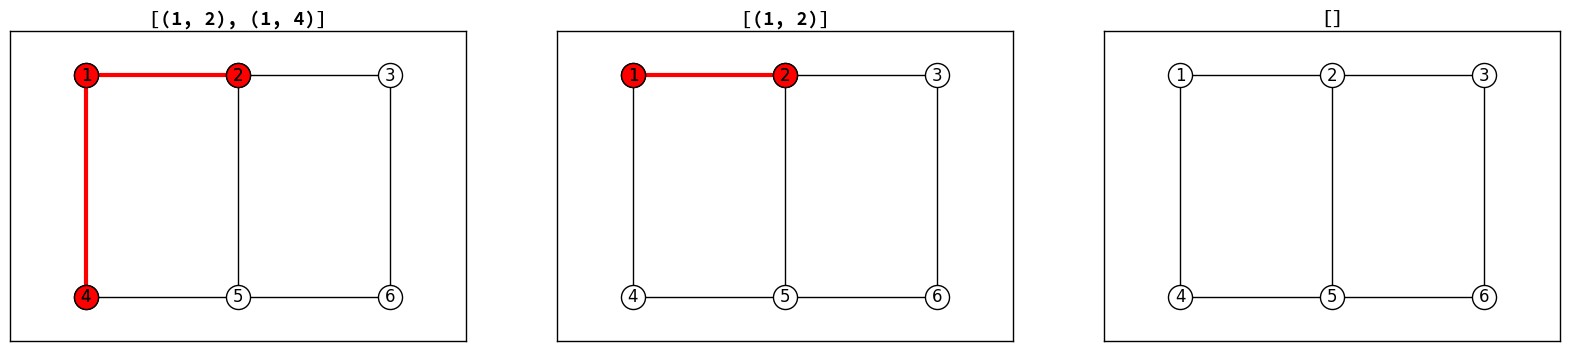

In [42]:
graph1 = []
graph2 = [(1,2)]
graph3 = [(1,2), (1,4)]
gs1 = GraphSet([graph1, graph2])
gs2 = GraphSet([graph2, graph3])
gs1 |= gs2
plt.figure(figsize=(20, 4))
for i, g in enumerate(gs1):
    plt.subplot(1, 3, i + 1)
    plt.title(g)
    draw(G, g)

## join(self, other)

自身と`other`とのjoinを返す．  
joinの定義を以下に示す．  
$gs1 \sqcup gs2 = \{a \cup b \  | \  a \in gs1 \ and \  b \in gs2\}$

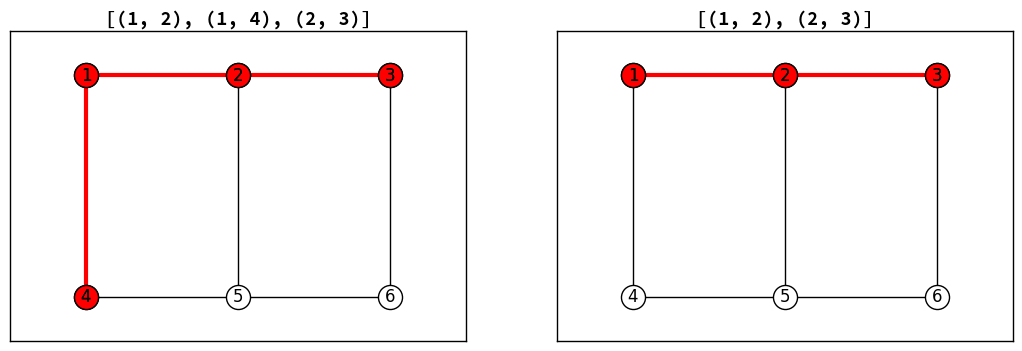

In [43]:
graph1 = [(1,2)]
graph2 = [(1,2), (1,4)]
graph3 = [ (2,3)]
gs1 = GraphSet([graph1, graph2])
gs2 = GraphSet([ graph3])
plt.figure(figsize=(20, 4))
for i, g in enumerate(gs1.join(gs2)):
    plt.subplot(1, 3, i + 1)
    plt.title(g)
    draw(G, g)

## meet(self, other)

自身とotherとのmeetを返す．  
meetの定義を以下に示す．  
$gs1 \sqcap gs2 = \{a \cap b \  | \  a \in gs1 \ and \  b \in gs2\}$

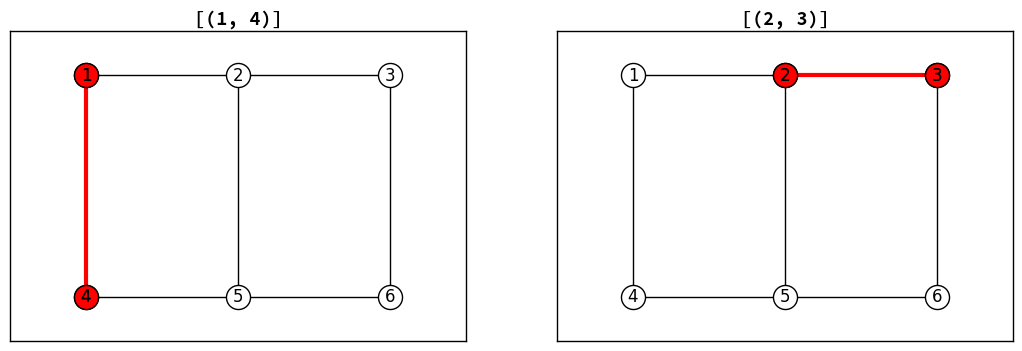

In [44]:
graph1 = [(1,2), (1,4)]
graph2 = [(1,2), (2,3)]
graph3 = [(1,4), (2,3)]
gs1 = GraphSet([graph1, graph2])
gs2 = GraphSet([ graph3])
plt.figure(figsize=(20, 4))
for i, g in enumerate(gs1.meet(gs2)):
    plt.subplot(1, 3, i + 1)
    plt.title(g)
    draw(G, g)

## subgraphs(self, other)

otherの部分グラフからなるグラフセットを返す．

GraphSet([[(1, 2)], [(1, 2), (1, 4)]]) GraphSet([[(1, 4), (2, 3)], [(1, 2), (2, 3)]])


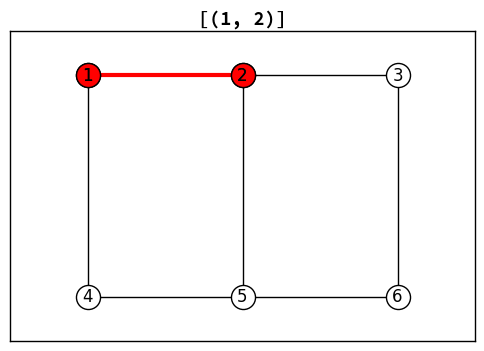

In [13]:
graph1 = [(1, 2)]
graph2 = [(1, 2), (1, 4)]
graph3 = graph1 + [ (2, 3)]
graph4 = [(1, 4), (2, 3)]
gs1 = GraphSet([graph1, graph2])
gs2 = GraphSet([graph3, graph4])
gs3 = GraphSet([[(1,2),(2,3),(1,4)]])
print(gs1, gs2)
for g in gs1.subgraphs(gs2):
    plt.title(g)
    draw(G, g)

## non_subgraphs(self, other)

otherの非部分グラフからなるグラフセットを返す．

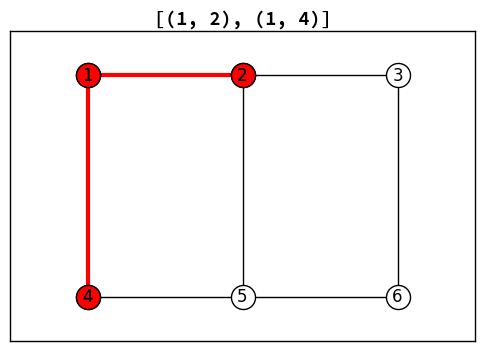

In [14]:
graph1 = [(1, 2)]
graph2 = [(1, 2), (1, 4)]
graph3 = [(1, 2), (2, 3)]
graph4 = [(1, 4), (2, 3)]
gs1 = GraphSet([graph1, graph2])
gs2 = GraphSet([graph3, graph4])
for g in gs1.non_subgraphs(gs2):
    plt.title(g)
    draw(G, g)

# グラフタイプ指定メソッド
ある条件を満たすグラフセットを返すメソッドをグラフタイプ指定メソッドと分類する．

## graphs(self, constraints)
指定した制約を満たすグラフセットを返す  
他のすべてのグラフタイプ指定メソッドは内部で`graphs`を呼び出して特定のグラフセットを返している  

### 各引数について  
* `vertex_groups`, optional, nested list  
入れ子になったリストを指定する．内部のリストの各要素はグラフの頂点を表していて，ある内部のリストの頂点が接続されているとき，ほかの内部のリストの頂点は接続されない．例えば，`[[1,5], [3]]`が与えられたとき，`1`と`5`は接続されるが，`3`とは接続されない．

* `degree_constraints`, optional, dict  
ノードをキー，`range`または整数値を値とする辞書を指定する．頂点の次数は対応する値によって制限される．例えば，`{1: 2, 6: range(2)}`が与えられたとき，ノード`1`の次数は2で，ノード`2`の次数は2未満となるが，他のノードの次数は影響を受けない．

* `num_edges`, optional, range or int  
グラフセットに含まれるグラフの辺の数を`range`もしくは整数値で指定する．例えば，`range(5)`が与えられたとき，グラフの辺の数は5未満になる．

* `no_loop`, optional, True or False  
ループを持つグラフを許可するかどうかを指定する．デフォルトで`False`となっている．

* `GraphSet`, optional, GraphSet  
格納されるグラフは，この引数で指定したグラフセットから選択される．  

* `linear_constraints`, optional, list  
線形制約`linear_constraints`は重み付き辺と上限・下限から構成される．辺の重みは正または負の値で，デフォルトでは1である．制約に含まれない辺の重みは0となる．例えば，`[([(1, 2, 0.6), (2, 5),(3, 6, 1.2)], (1.5, 2.0))]`が与えられたとする．入れ子になった第1要素のタプルは重み付き辺を表す．第2要素のタプルは上限・下限を表す．つまり，この制約の元で実現可能なグラフの重みの和は1.5から2.0であることを表している．そのようなグラフの例として，`[(1, 2), (2, 3), (3, 6)]`や`[(1, 2), (2, 5), (5, 6)]`がある．

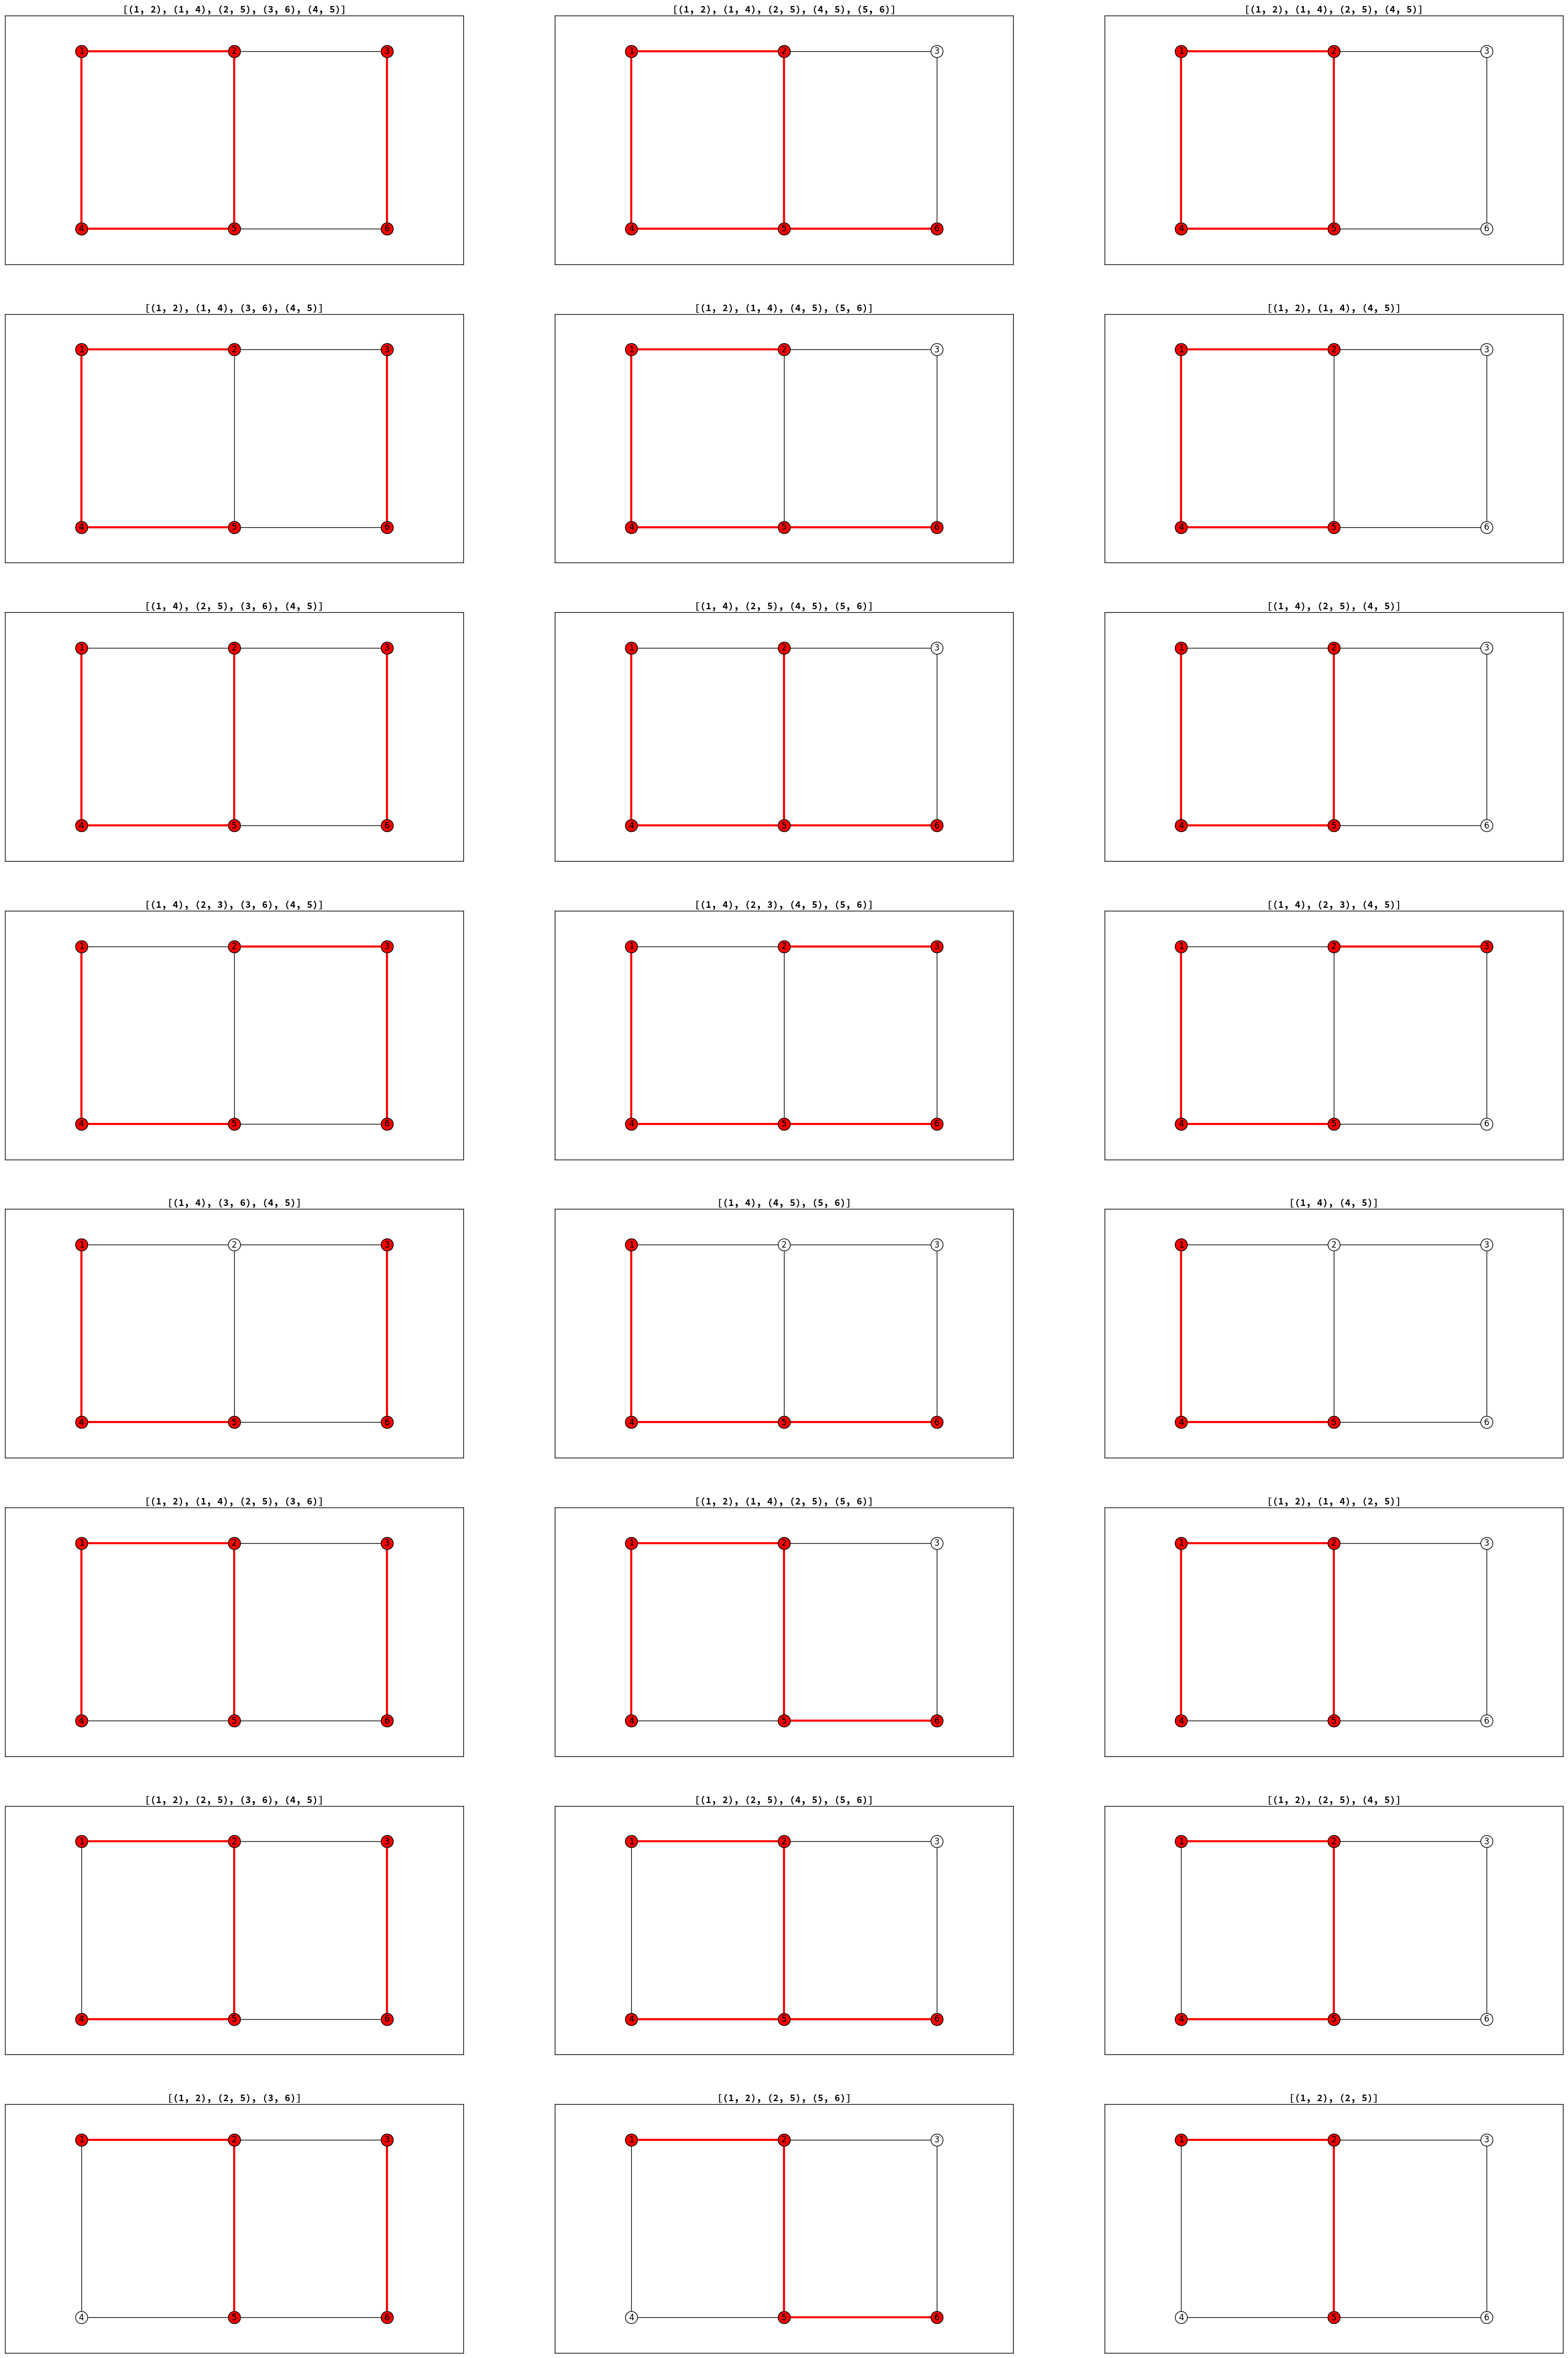

In [53]:
# vertex_groupの例
# 1,5は接続されるが3とは接続されない
graphset = GraphSet.graphs(vertex_groups=[[1,5],[3]])
plt.figure(figsize=(40, 60))
for i, graph in enumerate(graphset):
    plt.subplot(8, 3, i + 1)
    plt.title(graph)
    draw(G, graph)

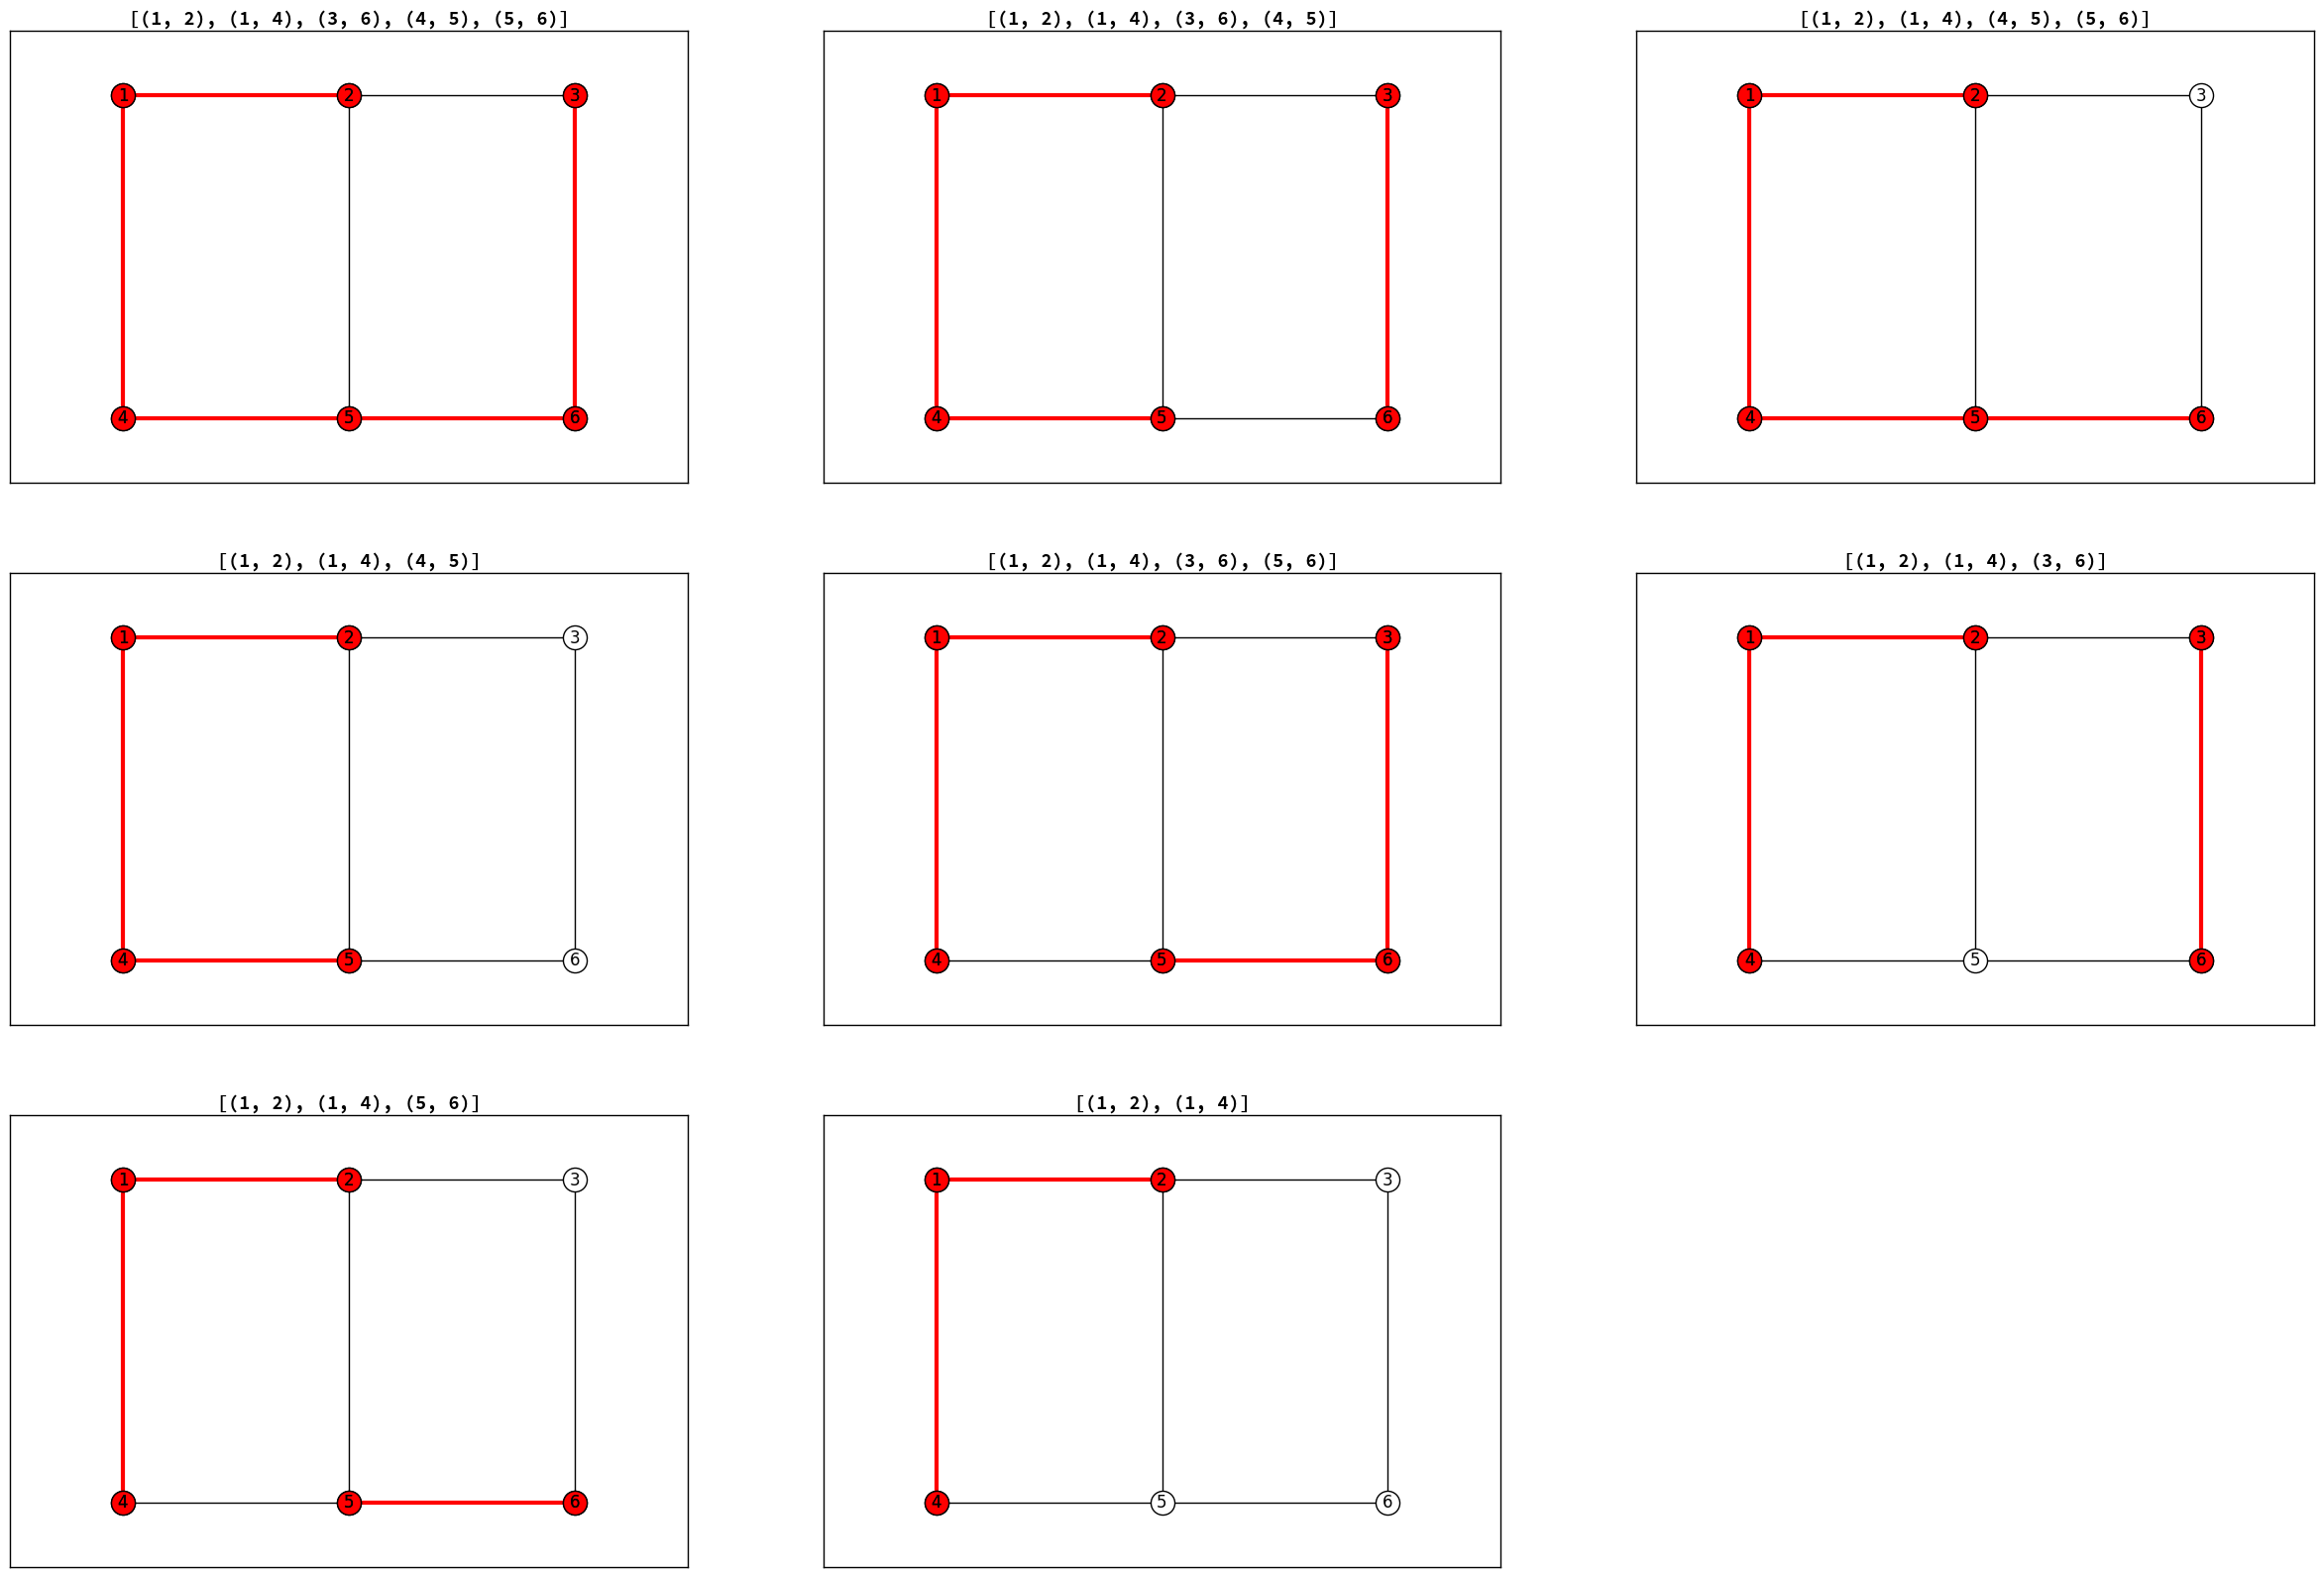

In [71]:
# degree_constraintsの例
# 1の次数は2，2の次数は2未満
graphset = GraphSet.graphs(degree_constraints={1: 2, 2: range(2)})
plt.figure(figsize=(30, 20))
for i, graph in enumerate(graphset):
    plt.subplot(3, 3, i + 1)
    plt.title(graph)
    draw(G, graph)

21


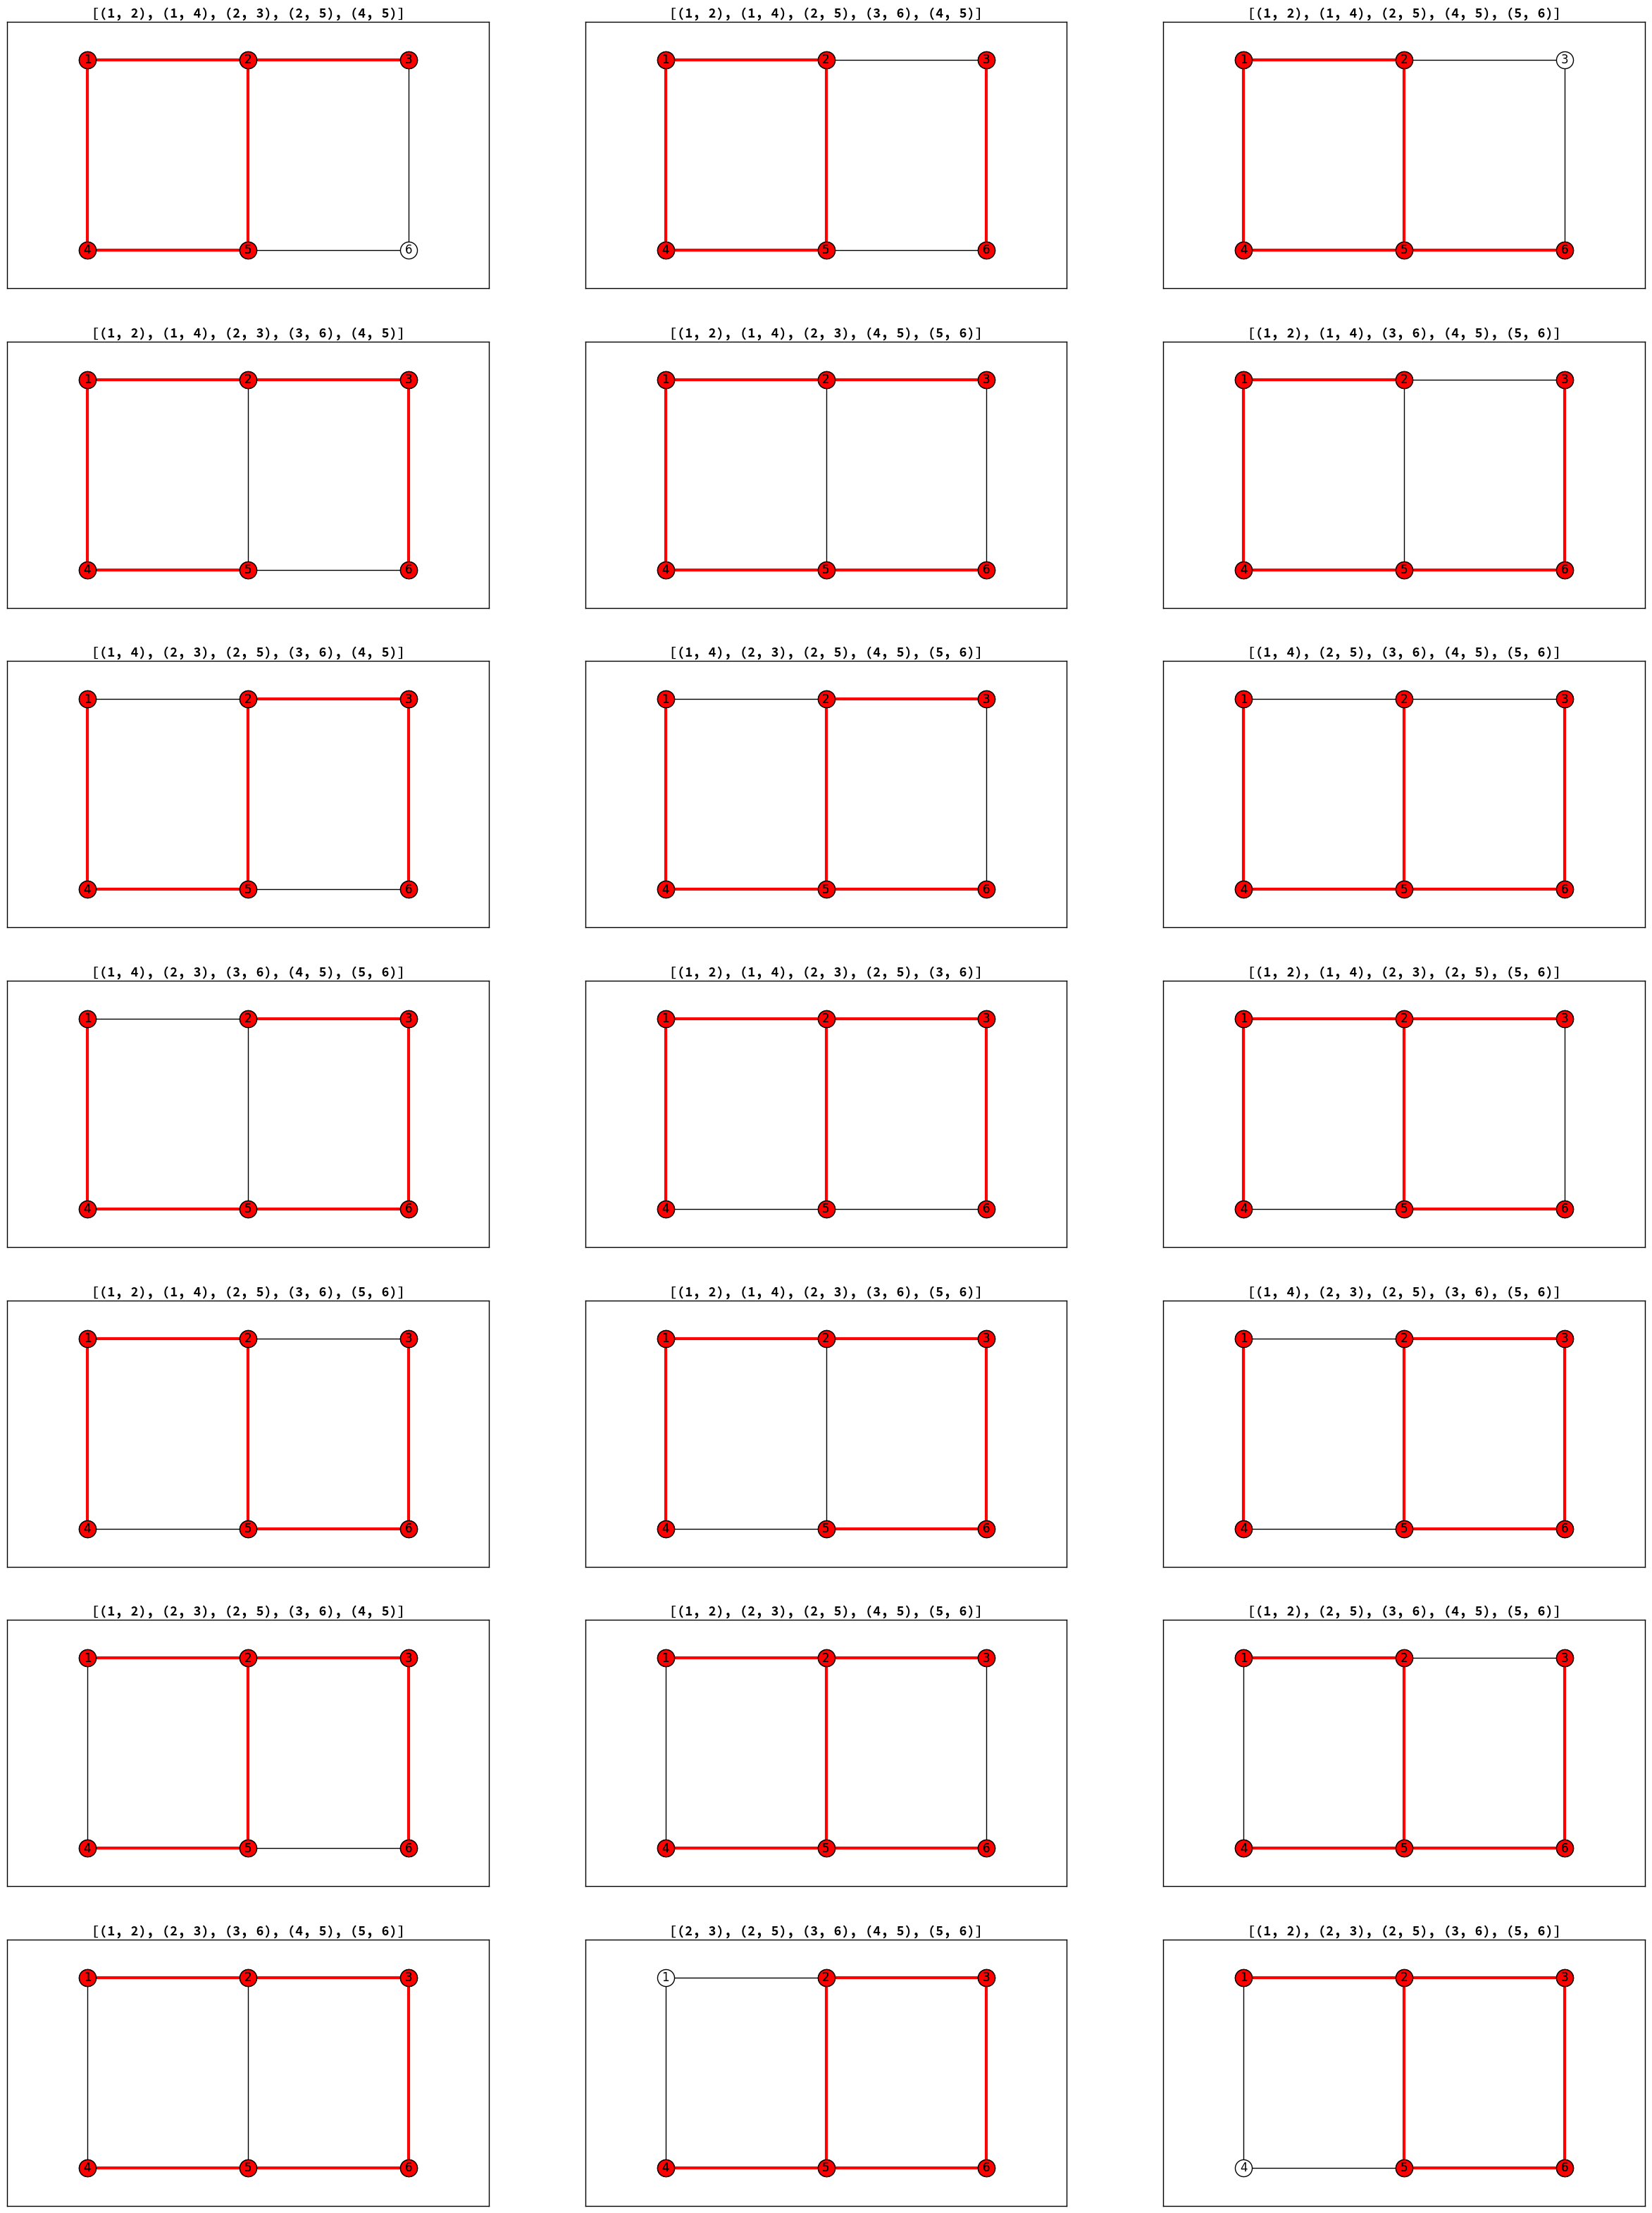

In [67]:
# num_edgesの例
# 辺の数が5のグラフ
graphset = GraphSet.graphs(num_edges=5)
print(len(graphset))
plt.figure(figsize=(30, 40))
for i, graph in enumerate(graphset):
    plt.subplot(7, 3, i + 1)
    plt.title(graph)
    draw(G, graph)

112


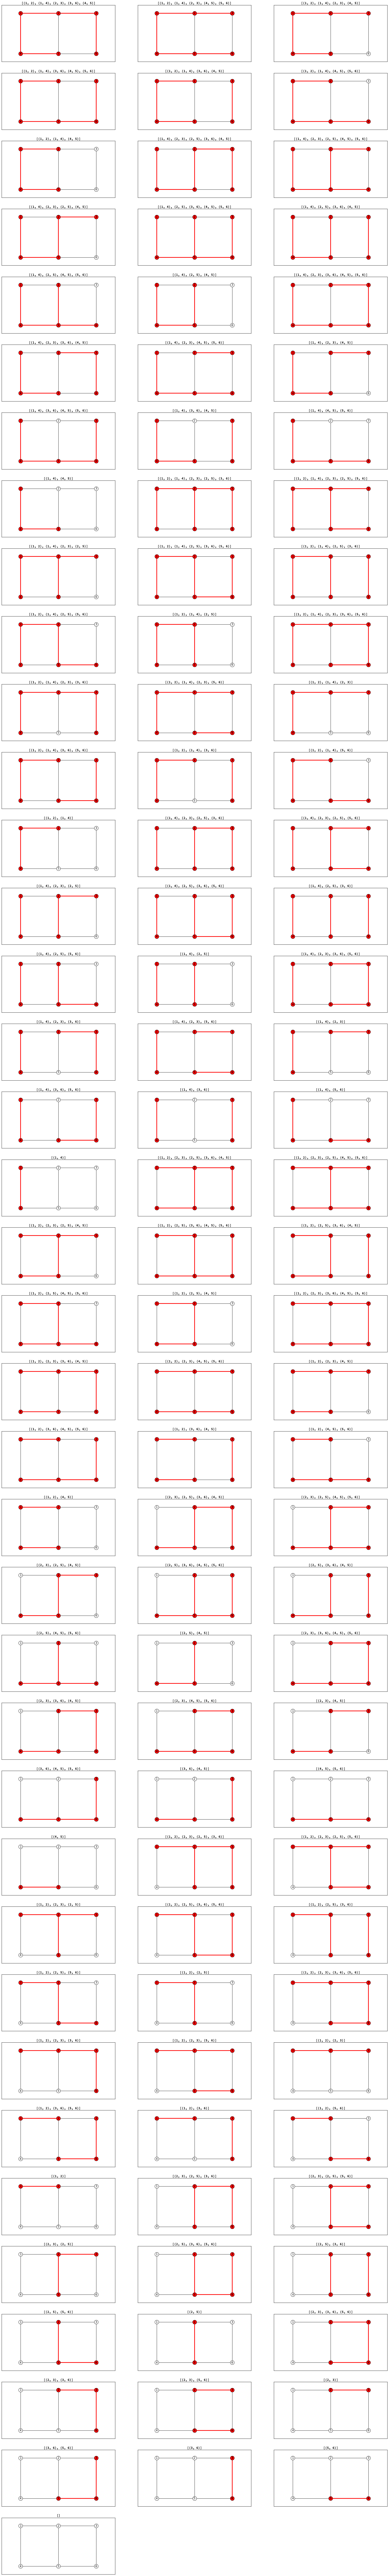

In [78]:
# no_loopの例
# no_loop=True
graphset = GraphSet.graphs(no_loop=True)
print(len(graphset))
plt.figure(figsize=(30, 200))
for i, graph in enumerate(graphset):
    plt.subplot(38, 3, i + 1)
    plt.title(graph)
    draw(G, graph)

3


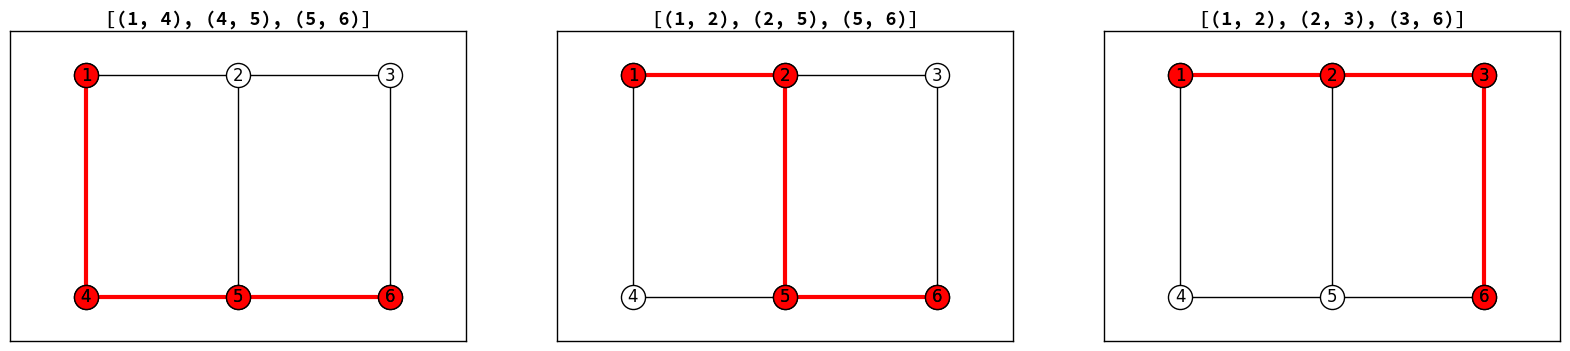

In [81]:
# graphsetの例
# ノード1,6間のパスのグラフセットから辺の数が3のグラフセットを得る
paths1_6 = GraphSet.paths(1,6)
graphset = GraphSet.graphs(num_edges=3, graphset=paths1_6)
print(len(graphset))
plt.figure(figsize=(20, 4))
for i, graph in enumerate(graphset):
    plt.subplot(1, 3, i + 1)
    plt.title(graph)
    draw(G, graph)

32


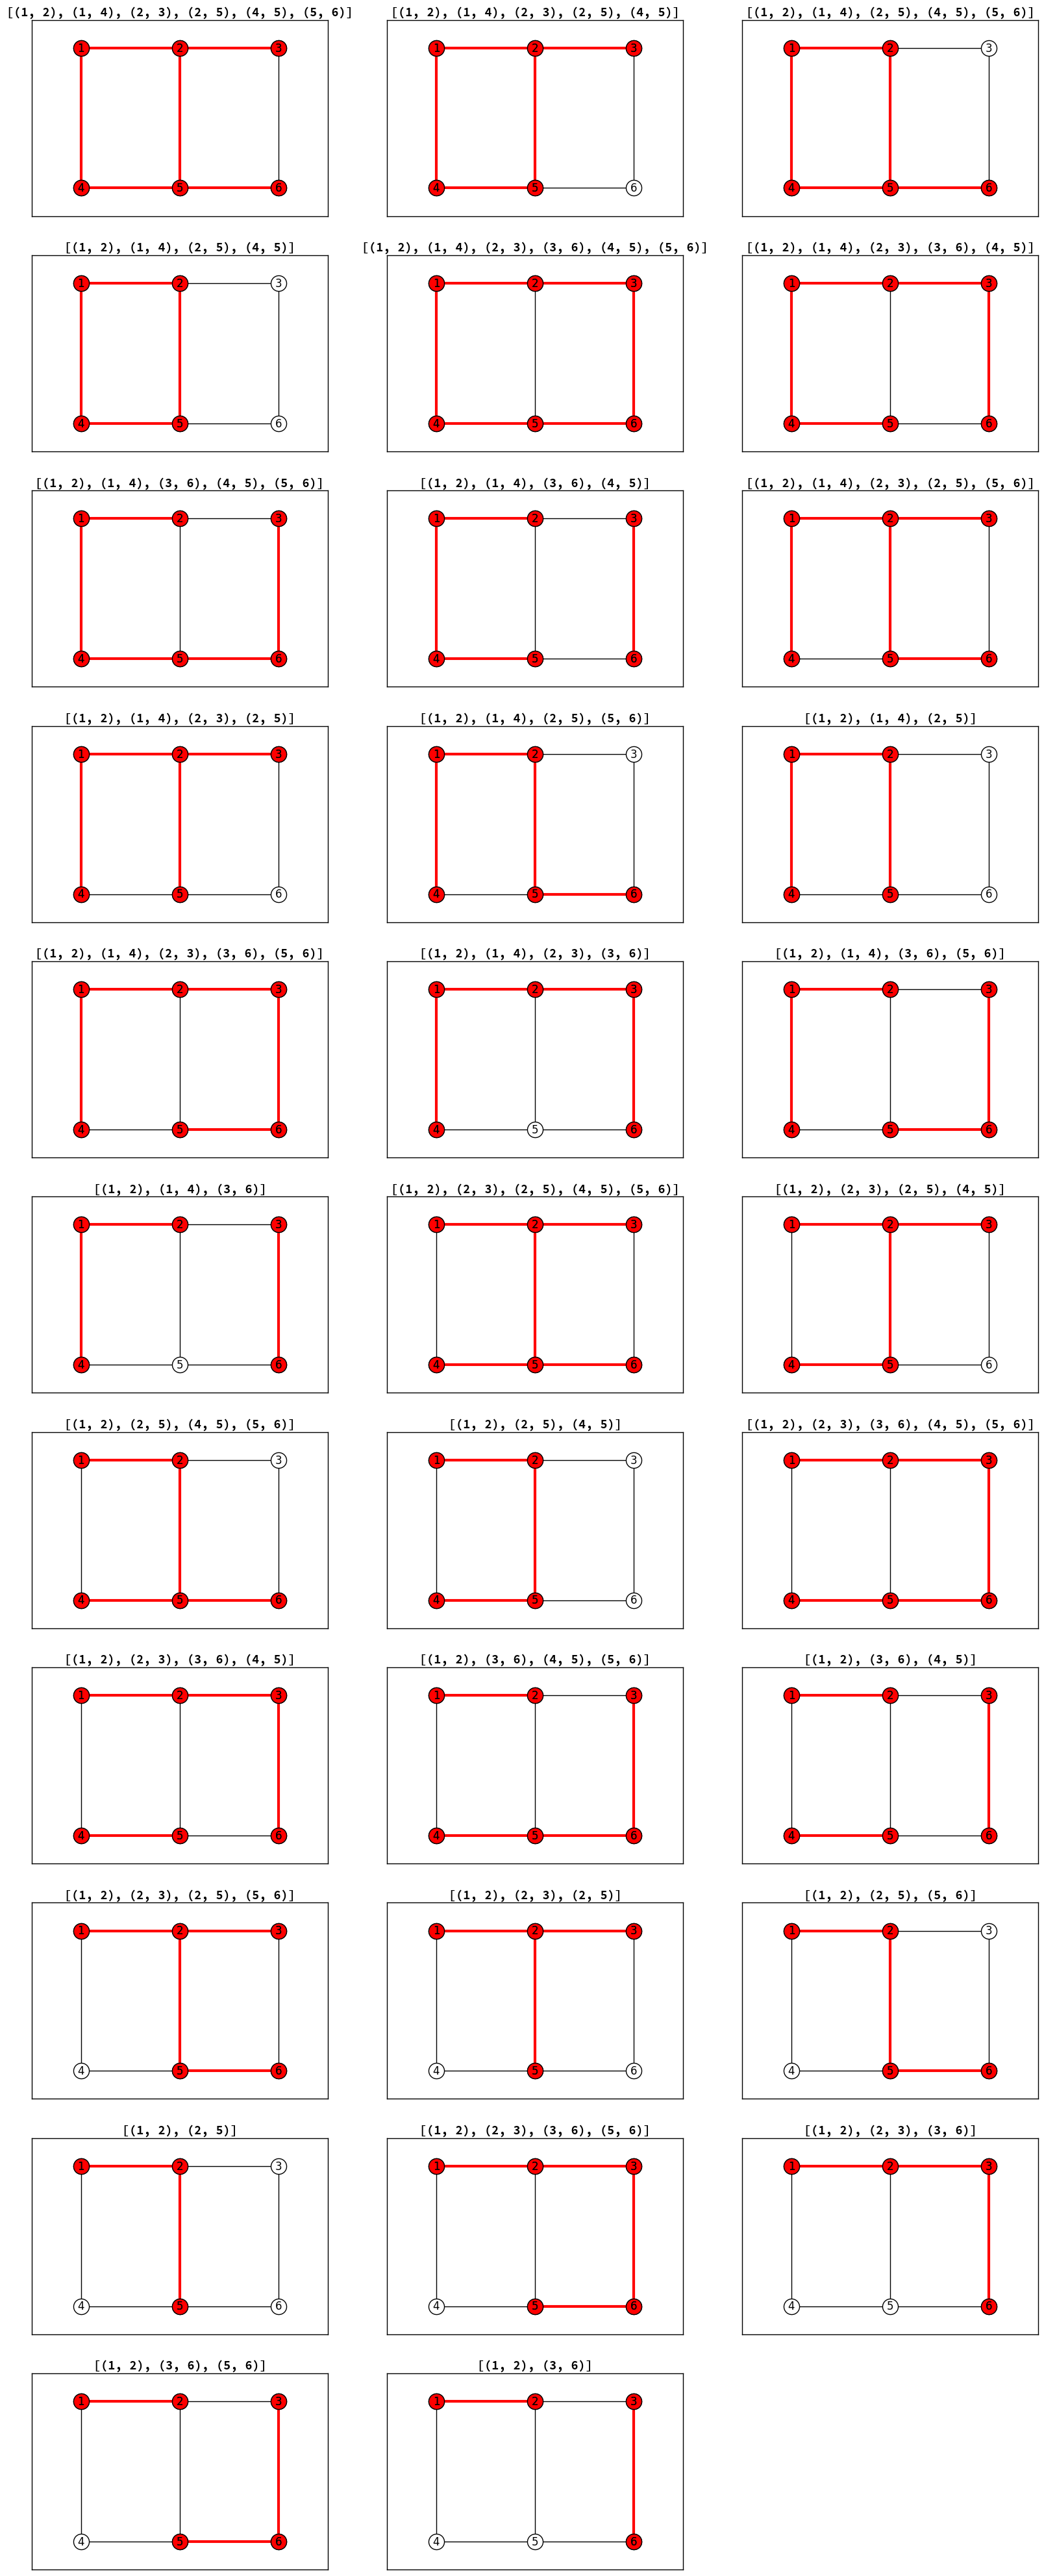

In [85]:
# linear_constraintsの例
graphset = GraphSet.graphs(linear_constraints=[([(1, 2, 0.6), (2, 5),(3, 6, 1.2)], (1.5, 2.0))])
print(len(graphset))
plt.figure(figsize=(20, 60))
for i, graph in enumerate(graphset):
    plt.subplot(13, 3, i + 1)
    plt.title(graph)
    draw(G, graph)